In [1]:
import pickle
import numpy as np
import pandas as pd
from csv import writer
import sklearn
from sklearn import metrics
import glob

import matplotlib.pyplot as plt
import seaborn as sns

## Read in saved dataframes

In [2]:

with open('\\dataframes\\final_wa_df.pickle', 'rb') as handle:
    wa_df= pickle.load(handle)

with open('\\dataframes\\final_stan_df.pickle', 'rb') as handle:
    stan_df = pickle.load(handle)

wa_content = wa_df.content
stan_content = stan_df.content

## Describe data

In [3]:
wa_df.head()

,filename,title,date,category,content,embeddings
10112,wa936bik6.txt,Minder kinderen geboren,2013-01-08,België,Minder kinderen geboren In Vlaamse ziekenhuize...,"[0.8717681169509888, 0.21637214720249176, 0.67..."
10113,wa936bik7.txt,Vlaams medicijn tegen tbc,2013-01-08,België,Vlaams medicijn tegen tbc Onderzoekers van het...,"[-0.1551680862903595, 0.6744857430458069, 0.13..."
10114,wa936bik8.txt,Directrice verdacht van spieken,2013-01-08,België,Directrice verdacht van spieken De directrice ...,"[-0.3453265130519867, -0.008550132624804974, -..."
10118,wa936bin3.txt,Weinig vrouwen met sjerp in ons land,2013-01-08,België,Weinig vrouwen met sjerp in ons land In januar...,"[-0.2693834602832794, 0.9814454913139343, -0.1..."
10116,wa936bin1.txt,Noémie is Miss België,2013-01-08,België,Noémie is Miss België Noémie Happart is de moo...,"[-0.3678942322731018, -0.24943530559539795, -0..."
...,...,...,...,...,...,...
6084,wa1164bui5.txt,Duizenden kleine pinguïns dood,2017-11-16,Buitenland,Duizenden kleine pinguïns dood Een grote ramp ...,"[-0.21590065956115723, 0.23220542073249817, -0..."
6085,wa1164buk1.txt,Nog meer uitstel in Congo,2017-11-16,Buitenland,Nog meer uitstel in Congo In Congo komen er ge...,"[-1.5455697774887085, -0.9892030358314514, 0.0..."
6086,wa1164buk2.txt,Nieuwe regering in Nederland,2017-11-16,Buitenland,Nieuwe regering in Nederland Nederland heeft e...,"[-1.0460810661315918, -0.7230560779571533, 0.5..."
6088,wa1164idk1.txt,"Ik wil onrecht aanklagen, maar liefst met een ...",2017-11-16,In de kijker,"""Ik wil onrecht aanklagen, maar liefst met een...","[-0.40642863512039185, -0.12022947520017624, 0..."


In [4]:
stan_df.head()

,filename,title,date,category,content,embeddings
0,De_Standaard-2013-01-02.1-1_DA(1).000001#2n.xml,No title,2013-01-02,REG,ANTWERPEN CARTOON'S : Kaasstraat 4-6 ( 03232.9...,"[0.12364207208156586, 0.616053581237793, -0.94..."
77,De_Standaard-2013-01-02.1-1_DB(91).000001#2n.xml,2008,2013-01-02,ECO,2008 1. Barack Obama 2. Baarmoederhalskankerva...,"[0.5498160123825073, 0.4841672480106354, -0.06..."
76,De_Standaard-2013-01-02.1-1_DB(89).000001#2n.xml,SCHIETEN NAAST DE SCHOOL,2013-01-02,BIBU,SCHIETEN NAAST DE SCHOOL In Syrië is het nieuw...,"[-0.4185646176338196, -0.7888291478157043, -0...."
75,De_Standaard-2013-01-02.1-1_DB(88).000001#2n.xml,Tientallen doden na paniek bij vuurwerk,2013-01-02,BIBU,Tientallen doden na paniek bij vuurwerk Abidja...,"[-0.47230836749076843, -0.4041571617126465, -0..."
74,De_Standaard-2013-01-02.1-1_DB(87).000001#2n.xml,2010,2013-01-02,ECO,2010 1. iPad 2. Wikileaks 3. Benidorm Bastards...,"[0.03733360022306442, 0.35339534282684326, -0...."
...,...,...,...,...,...,...
5710,278b7cac-ca2f-11e7-92e4-9b28e8def83c_DB.000001...,Brie Larson onder vuur voor haar rol in 'Basma...,2017-11-16,DS2,Film Brie Larson onder vuur voor haar rol in '...,"[-0.39755165576934814, 0.09898927062749863, -0..."
26237,ba0d9754-ca25-11e7-8c1a-761564dfdb46_DB.000001...,No title,2017-11-16,Sport,' Als het nieuwe onderzoek volgens plan verloo...,"[-1.2090281248092651, 0.4535748064517975, 0.42..."
11886,53d3ae50-ca26-11e7-8c1a-761564dfdb46_DB.000001...,Handelaars lanceren eigen Oranjepas,2017-11-16,Regio Vlaams-Brabant,Diest Handelaars lanceren eigen Oranjepas Dies...,"[-0.4931115508079529, 0.8239607214927673, -0.1..."
12542,58e7a054-ca3f-11e7-92e4-9b28e8def83c_DB.000001...,Meer schadeclaims na politieacties,2017-11-16,Binnenland,Justitie Meer schadeclaims na politieacties Ee...,"[-1.2051165103912354, 0.5310210585594177, 0.00..."


In [5]:
wa_df = wa_df[wa_df.title != 'No title']
stan_df = stan_df[stan_df.title != 'No title']

In [11]:
split_wa_content = wa_content.str.split().map(lambda x: len(x))
split_stan_content = stan_content.str.split().map(lambda x: len(x))

In [45]:
print(split_wa_content[split_wa_content > 400].shape[0])
print(split_stan_content[split_stan_content > 400].shape[0])

481
36


In [18]:
split_wa_content[split_wa_content==0].count()

0

In [17]:
split_stan_content[split_stan_content==0].count()

0

In [7]:
split_wa_content.describe(percentiles=[.25, .50, .75, .90, .95, .99])

count    8744.000000
mean      161.982960
std       142.920961
min         3.000000
25%        83.000000
50%       100.000000
75%       195.000000
90%       261.000000
95%       425.000000
99%       783.000000
max      1558.000000
Name: content, dtype: float64

In [179]:
split_stan_content.describe(percentiles=[.25, .50, .75, .90, .95, .99])

count    202284.000000
mean        372.629333
std         370.773138
min           0.000000
25%         119.000000
50%         266.000000
75%         524.000000
90%         802.000000
95%         965.000000
99%        1726.000000
max       24140.000000
Name: content, dtype: float64

## Visualize data


Text(0, 0.5, 'Count of articles')

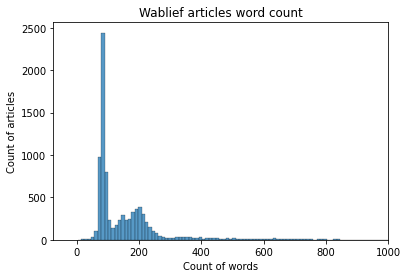

In [29]:
fig, ax = plt.subplots()
sns.histplot(split_wa_content, ax=ax)
ax.set_xlim(right=1000)
plt.title("Wablief articles word count")
plt.xlabel("Count of words")
plt.ylabel("Count of articles")

Text(0, 0.5, 'Number of articles')

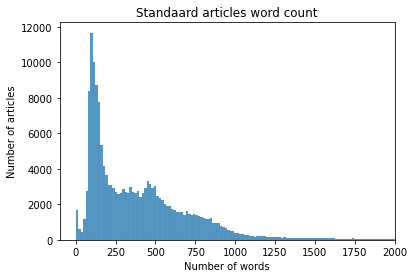

In [30]:
fig, ax = plt.subplots()
sns.histplot(split_stan_content, ax=ax)
ax.set_xlim(left=-100,right=2000)
plt.title("Standaard articles word count")
plt.xlabel("Number of words")
plt.ylabel("Number of articles")

In [49]:
split_wa_content = pd.DataFrame(split_wa_content)
split_stan_content = pd.DataFrame(split_stan_content)
both_split_df = pd.concat([split_wa_content.assign(dataset='Wablieft'), split_stan_content.assign(dataset='Standaard')])

Text(0, 0.5, 'Number of articles')

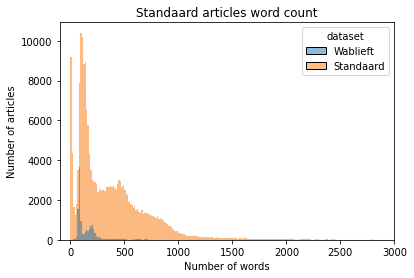

In [55]:
fig, ax = plt.subplots()
sns.histplot(both_split_df, x = 'content', ax=ax, hue="dataset")
ax.set_xlim(left=-100,right=3000)
plt.title("Standaard articles word count")
plt.xlabel("Number of words")
plt.ylabel("Number of articles")

#### Describe top1 similarity scores of pairs -- MQA finetuned en RobBERT base finetuned

In [4]:
with open('comparable_corpora\similarity_scores\\top1SimScoreListmqaWaStan.pickle', 'rb') as handle:
    mqa_top1 = pickle.load(handle)

In [20]:
mqa_df = pd.DataFrame(mqa_top1)

In [29]:
mqa_df.describe(percentiles=[0.10, 0.25, 0.50, 0.75, 0.90])

,0
count,8701.000000
mean,0.657086
std,0.110917
min,0.330495
10%,0.508330
25%,0.570291
50%,0.660437
75%,0.745858
90%,0.800843
max,0.940696


Text(0, 0.5, 'Amount')

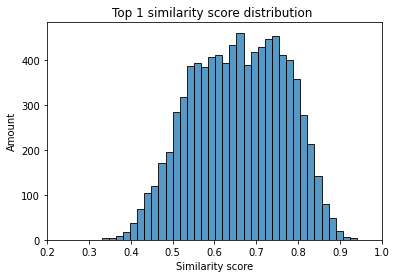

In [27]:
# -- robbert-v2-dutch-base-mqa-finetuned
fig, ax = plt.subplots()
sns.histplot(mqa_top1, ax=ax)
ax.set_xlim(left=0.2,right=1)
plt.title("Top 1 similarity score distribution ")
plt.xlabel("Similarity score")
plt.ylabel("Amount")

In [9]:
with open('comparable_corpora\similarity_scores\\top1SimScoreListRobBERTWaStan.pickle', 'rb') as handle:
    robbert_top1 = pickle.load(handle)

In [18]:
robbert_df = pd.DataFrame(robbert_top1)

In [30]:
robbert_df.describe(percentiles=[0.10, 0.25, 0.50, 0.75, 0.90])

,0
count,8701.000000
mean,0.655384
std,0.072646
min,0.332692
10%,0.563565
25%,0.608197
50%,0.655903
75%,0.702554
90%,0.746049
max,0.935655


Text(0, 0.5, 'Amount')

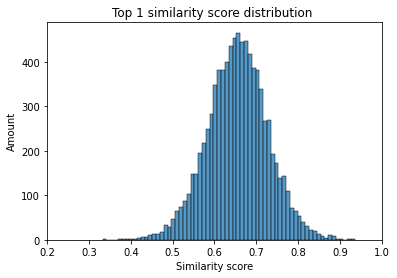

In [31]:
# robbert-v2-dutch-base
fig, ax = plt.subplots()
sns.histplot(robbert_top1, ax=ax)
ax.set_xlim(left=0.2,right=1)
plt.title("Top 1 similarity score distribution ")
plt.xlabel("Similarity score")
plt.ylabel("Amount")


#### Describe manually scored data

In [12]:
matchesList = [0.7697,
        0.72141486,
        0.71388,
        0.788607,
        0.836498,
        0.704664,
        0.7805206,
        0.80987,
        0.797313,
        0.743338346,
        0.799838,
        0.781242,
        0.673715,
        0.7851778864,
        0.680668,
        0.8285657,
        0.77680337,
        0.89255422,
        0.710689,
        0.792078137,
        0.75573337,
        0.8639686,
        0.923899,
        0.8299018,
        0.818773388,
        0.774552166,
        0.791702,
        0.6543264,
        0.788223028,
        0.7355657,
        0.67106187,
        0.580847,
        0.627487,
        0.66209,
        0.681355,
        0.768626,
        0.733748,
        0.69154,
        0.51817,
        0.681477,
        0.78126,
        0.7633886,
        0.8638988,
        0.5258505,
        0.783164,
        0.777009,
        0.64473,
        0.729588,
        0.763598,
        0.8209926,
        0.8132002,
        0.7953649,
        0.776327,
        0.755874,
        0.756482899,
        0.75797,
        0.7536767,
        0.6356,
        0.708218,
        0.76766467,
        0.7696149,
        0.61336,
        0.6577181,
        0.7659018,
        0.759663,
        0.76228386,
        0.85247099,
        0.73827588,
        0.4924735,
        0.7233466,
        0.76480269,
        0.63647,
        0.72138,
        0.8175677,
        0.70753,
        0.737872,
        0.753278,
        0.838064,
        0.726966,
        0.8079567,
        0.653346,
        0.74183446,
        0.81097239,
        0.689377367,
        0.62185,
        0.75594,
        0.7558307,
        0.7798176,
        0.847305,
        0.754778,
        0.642159,
        0.74452215,
        0.7798978,
        0.75354,
        0.5777378,
        0.799755,
        0.73424,
        0.5977584,
        0.686517,
        0.6422056,
        0.6759755,
        0.695020914,
        0.853763,
        0.82201665,
        0.69139,
        0.631638,
        0.76909,
        0.847588956,
        0.79919,
        0.78601,
        0.7322576,
        0.7635,
        0.77563,
        0.72278499,
        0.811708,
        0.66525,
        0.6677179,
        0.78369,
        0.6500568,
        0.76673,
        0.718989,
        0.73766,
        0.77780485,
        0.751827,
        0.77792,
        0.5125471,
        0.7146214,
        0.712471485,
        0.64337754249,
        0.666738927,
        0.6788367629,
        0.6716255,
        0.843695998,
        0.674108445644,
        0.7829052805,
        0.70365959405899,
        0.77655506,
        0.6633684635,
        0.8291893601,
        0.7387883067,
        0.73019278049,
        0.6969285607,
        0.714788675,
        0.760915637,
        0.8273297548,
        0.923899471759,
        0.9047259688,
        0.9037084579467,
        0.5706487298,
        0.77131378,
        0.818009138,
        0.7564840316,
        0.7415358424,
        0.83821976,
        0.7958508729934,
        0.816393852233,
        0.855634,
        0.764023065567,
        0.6651859879,
        0.639792382717,
        0.7571749687,
        0.82533246,
        0.834297776,
        0.833146095,
        0.83930498361,
        0.61638921499,
        0.543234169,
        0.7669585347,
        0.6891207098,
        0.63000345,
        0.752358198,
        0.78967285,
        0.760514676,
        0.6784633994,
        0.7990390658,
        0.860850214958,
        0.689050734,
        0.711645185947,
        0.746158,
        0.74563032,
        0.7669916749,
        0.7235053777,
        0.8123298,
        0.6792410016,
        0.701078534,
        0.71442246437,
        0.722155749,
        0.80628609,
        0.7795466184616,
        0.739085,
        0.78737384,
        0.823471367,
        0.637516,
        0.7135028,
        0.64341038,
        0.6608159,
        0.79101634,
        0.60918426,
        0.6051189899,
        0.72729367,
        0.89086,
        0.6616236,
        0.71711957,
        0.69035869,
        0.6787018,
        0.6538558,
        0.74488943815,
        0.791976,
        0.82162,
        0.7984265089,
        0.76979,
        0.6847710609,
        0.8136815,
        0.6635019,
        0.87014955,
        0.820418238,
        0.74413615,
        0.69744706,
        0.7076369,
        0.704141259,
        0.772098,
        0.7256688,
        0.74525088,
        0.771788299,
        0.88479,
        0.78804278,
        0.703075,
        0.581823587,
        0.7161303,
        0.72783309,
        0.787395,
        0.714924,
        0.7885076999,
        0.7974855899,
        0.82318055,
        0.732838809,
        0.66058075,
        0.719847,
        0.809242546,
        0.7810799,
        0.746488,
        0.68827325,
        0.62747842,
        0.70261967,
        0.8243128,
        0.7264975309,
        0.7546389,
        0.7904949,
        0.73430216,
        0.739148557,
        0.64654779,
        0.81631809,
        0.7605623,
        0.4436697,
        0.7363989,
        0.840628445,
        0.7958248,
        0.8284159,
        0.81944477,
        0.7998687,
        0.7483889,
        0.76568597,
        0.778772,
        0.77987897,
        0.773603618,
        0.800198,
        0.73052,
        0.7266547,
        0.727787077,
        0.6135877,
        0.6108038,
        0.710565,
        0.6744478
        ]


In [13]:
noMatchesList = [
    0.5535407,
    0.6986519,
    0.51107543,
    0.4589526,
    0.5063756,
    0.52886277,
    0.5447489,
    0.55582004,
    0.57022494,
    0.552105307579,
    0.6082630157,
    0.57582497,
    0.63724285,
    0.61024689,
    0.5978436,
    0.595395088,
    0.5180177,
    0.622035026,
    0.689134597,
    0.48909914449,
    0.498851418,
    0.44220787,
    0.512252509,
    0.548665285,
    0.5386719,
    0.50775814056,
    0.4760343,
    0.569921,
    0.4769304,
    0.571814239,
    0.5141970515,
    0.55523240566,
    0.6670523881,
    0.65486276,
    0.642258465,
    0.5293843746,
    0.622388899,
    0.59334117174,
    0.6066381335,
    0.52446991205,
    0.660279095,
    0.61309307,
    0.61719208955,
    0.509504199,
    0.53461307,
    0.55632734,
    0.5305280089378,
    0.5029930472,
    0.60603237,
    0.49210578,
    0.635853469,
    0.6405651569,
    0.678285896778,
    0.513371527,
    0.71126574,
    0.455496877,
    0.67995160818,
    0.691637158,
    0.637583673,
    0.63278347,
    0.4872620998,
    0.668940067,
    0.61449253559,
    0.554829,
    0.4880725,
    0.54832077026,
    0.5618026256,
    0.56353968,
    0.489055693149,
    0.46197,
    0.55689138,
    0.640002429,
    0.54211628,
    0.557211399,
    0.595259,
    0.6195359,
    0.5236569,
    0.664387,
    0.6819516,
    0.503838,
    0.576270997,
    0.62811075,
    0.604570508,
    0.6187288,
    0.654753,
    0.59569638967,
    0.5765741467,
    0.65639215,
    0.560441255,
    0.52692282,
    0.62480497,
    0.5717596,
    0.4443662,
    0.5964726,
    0.63212949,
    0.6097509,
    0.61967355,
    0.68474,
    0.73098,
    0.469717,
    0.6137657,
    0.61052447557,
    0.4984967,
    0.6565629,
    0.59753525257,
    0.5660267,
    0.6557744,
    0.56982338,
    0.62308949,
    0.545513,
    0.60677,
    0.715595,
    0.7052625,
    0.61761957,
    0.64363306,
    0.6009945,
    0.592138707,
    0.61603069,
    0.598185658,
    0.5933338,
    0.6277466,
    0.5623755,
    0.6203489,
    0.5040397,
    0.73360979,
    0.7952144,
    0.45291349,
    0.41730788,
    0.54704487,
    0.4835606,
    0.5867008,
    0.49841472,
    0.556829,
    0.74117487,
    0.444108039,
    0.488289,
    0.57693058,
    0.528937,
    0.520601
]


In [14]:
matchesDf = pd.DataFrame(matchesList)
noMatchesDf = pd.DataFrame(noMatchesList)
manualRatedDf = pd.concat([matchesDf.assign(dataset='Match'), noMatchesDf.assign(dataset='No Match')])

In [13]:
with open('dataframes\manualRatedDf.pickle', 'rb') as handle:
    manualRatedDf = pickle.load(handle)

In [24]:
manualRatedDf.head()

,WaFile,WaContent,StanFile,StanContent,Score,Match
0,wa1077we4.txt,Tom Waes is slimste mens Tom Waes won de tv-qu...,20151209_2823c25e-9ddc-11e5-939a-0950ec295d9d_...,FILM Jan Verheyen verfilmt Geeraerts Jan Verhe...,0.746599,0
1,wa1073we2.txt,Groene torens Bij flatgebouwen denk je aan tor...,20151114_70269242-8a3c-11e5-ba7c-192370607c1e_...,Erfgoed Renovatie voor Théâtre des Galeries De...,0.729327,0
2,wa969bin1.txt,Zondag zonder auto's Vorige zondag bleven in 2...,De_Standaard-2013-09-14(70).000001#3n.xml,FIETSEN WERKT PAS ALS HET ook FIJN IS Met de f...,0.755888,0
3,wa1017vp1.txt,Lego wil geen vrouwen meer In augustus bracht ...,20140926_91575ffa-44bf-11e4-b7b6-3edccc6aab7d_...,Bobbejaanland investeert in nieuwe attractie L...,0.730632,0
4,wa1119bin1.txt,Veel jongeren volgen bijles Steeds meer jonger...,27ed67c2-a114-11e6-afeb-65d0f2231cd0_DB.000001...,' Leerkrachten zien dat hun leerlingen goed pr...,0.899578,1
...,...,...,...,...,...,...
95,wa949sam1.txt,De verhalen van een striptekenaar België is ee...,De_Standaard-2013-04-12(26).000001#2n.xml,Pas verschenen Ikke ( Marc Legendre ) Biebel 3...,0.643192,0
96,wa1070sam1.txt,"""Om gelukkig te worden, moet je zelf in actie ...",20151030_4037d5dc-7bd7-11e5-9d64-46a60f66a63f_...,De 79ste Boekenbeurs loopt van 31 oktober tot ...,0.737415,0
97,wa974bik7.txt,Fonds huurder en verhuurder Freya Van Den Boss...,De_Standaard-2013-10-21(32).000001#3n.xml,Meer gezinnen dreigen uit huis te worden gezet...,0.791224,1
98,wa953bih3.txt,Belgen eten minder vlees Belgen eten minder vl...,De_Standaard-2013-05-04(123).000001#2n.xml,"' Raken aan Brussel , dat is een atoombom ' Ch...",0.729149,0


Text(0, 0.5, 'Amount')

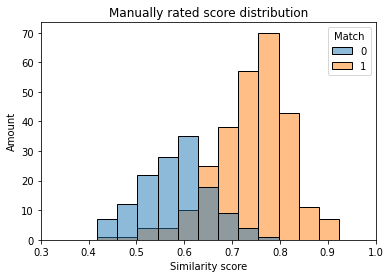

In [8]:
fig, ax = plt.subplots()
sns.histplot(manualRatedDf,x='Score',hue='Match', ax=ax)
ax.set_xlim(left=0.3,right=1)
plt.title("Manually rated score distribution")
plt.xlabel("Similarity score")
plt.ylabel("Amount")

In [16]:
manualRatedDf.loc[manualRatedDf["Match"] == 1].describe(percentiles=[0.01, 0.05,0.10, .25, .50, .75, .90, .95, .99])

,Score,Match
count,271.000000,271.0
mean,0.741523,1.0
std,0.076843,0.0
min,0.443670,1.0
1%,0.516483,1.0
5%,0.612082,1.0
10%,0.643378,1.0
25%,0.695975,1.0
50%,0.753278,1.0
75%,0.790756,1.0


In [24]:
matchesDf.describe(percentiles=[0.10,.25, .50, .75, .90, .95, .99])

,0
count,273.000000
mean,0.740824
std,0.076994
min,0.443670
10%,0.642440
25%,0.691540
50%,0.752358
75%,0.790495
90%,0.828199
95%,0.849542


In [15]:
matchesDf.loc[matchesDf[0] <= 0.642].count()

0    47
dtype: int64

In [25]:
noMatchesDf.describe(percentiles=[0.10, .25, .50, .75, .90, .95, .99])

,0
count,139.000000
mean,0.579818
std,0.072413
min,0.417308
10%,0.488246
25%,0.525696
50%,0.576574
75%,0.623947
90%,0.670809
95%,0.699313


In [37]:
matchesDf.loc[matchesDf[0] >= 0.671].count()

0    226
dtype: int64

In [38]:
noMatchesDf.loc[noMatchesDf[0] >= 0.642].count()

0    25
dtype: int64

In [20]:
print(7/139)

0.050359712230215826


### ROC

In [87]:
fpr, tpr, thresholds = metrics.roc_curve(manualRatedDf["Match"].tolist(), manualRatedDf["Score"].tolist(), pos_label="Match")

In [40]:
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.9316414999868236

In [5]:
display = metrics.RocCurveDisplay(fpr, tpr, roc_auc=roc_auc, estimator_name="Log reg BERT - TFIDF")
display.plot()
plt.plot([0,1], [0,1], linestyle='--')
plt.show()

NameError: name 'metrics' is not defined

In [126]:
# LogReg tpr, fpr
lrfpr = [0.     , 0.     , 0.     , 0.03125, 0.03125, 0.0625 , 0.0625 ,
       0.09375, 0.09375, 0.125  , 0.125  , 0.15625, 0.15625, 0.1875 ,
       0.1875 , 0.21875, 0.21875, 0.25   , 0.25   , 0.28125, 0.28125,
       0.875  , 0.875  , 0.96875, 0.96875, 1.     ]
lrtpr = [0.        , 0.01587302, 0.50793651, 0.50793651, 0.53968254,
       0.53968254, 0.6031746 , 0.6031746 , 0.74603175, 0.74603175,
       0.76190476, 0.76190476, 0.79365079, 0.79365079, 0.87301587,
       0.87301587, 0.92063492, 0.92063492, 0.93650794, 0.93650794,
       0.96825397, 0.96825397, 0.98412698, 0.98412698, 1.        ,
       1.        ]

lrroc_auc = metrics.auc(lrfpr, lrtpr)

### EER

In [96]:
def calculateEER(th, frr, fpr):

    #calculate threshold at which eer occurs
    eerth = th[np.nanargmin(np.absolute((frr-fpr)))]

    #calculate eer
    eer = fpr[np.nanargmin(np.absolute((frr-fpr)))]
    
    return eer, eerth 

def plotFARFNR(threshold, fpr, fnr, eer, eerth):
    plt.plot(threshold, fpr, label='FAR')
    plt.plot(threshold, fnr, label='FNR')

    #mark EER on the plot
    plt.plot(eerth, eer, marker='o')
    plt.annotate("EER", (eerth, eer))
    
    plt.xlim(0.2, 1)
    plt.ylim(0, 1)
    plt.xlabel("Threshold")
    plt.ylabel("Error rate")
    plt.title("FAR and FNR as function of the decision threshold")
    plt.legend()
    plt.show()

In [45]:
fnr = 1 - tpr

In [90]:
eer, eer_threshold = calculateEER(thresholds, fnr, fpr)

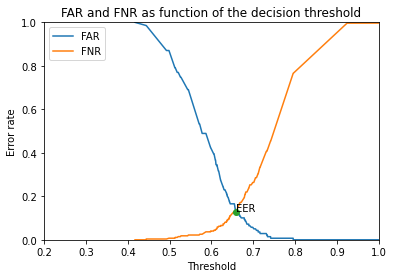

In [97]:
plotFARFNR(thresholds, fpr, fnr, eer, eer_threshold)

In [95]:
print("The EER value is: " + str(eer) +", with threshold: " + str(eer_threshold))

The EER value is: 0.12949640287769784, with threshold: 0.6577181


### Accuracy and F1

In [98]:
def listAccF1(id, scores):
    acclist = []
    f1list = []
    # create a list with 50 thresholds
    thresholds = np.arange(0.4, 1, 0.012)

    # predict different accuracies and f1-scores based on predictions
    for threshold in thresholds:
        genuine_pred = np.where(scores > threshold, 1, 0)
        accuracy = metrics.accuracy_score(id, genuine_pred)
        f1 = metrics.f1_score(id, genuine_pred)
        acclist.append(accuracy)
        f1list.append(f1)

    return thresholds, acclist, f1list

def plot_ACCF1(thresholds, acclist, f1list):
    plt.plot(thresholds, acclist, label='Accuracy')
    plt.plot(thresholds, f1list, label='F1')
    plt.xlim(0.4, 1)
    plt.ylim(0, 1)
    plt.title('Accuracy and F1')
    plt.xlabel('DET')
    plt.ylabel('Score')
    plt.legend()
    plt.show

In [100]:
thresholds, acclist, f1list = listAccF1(manualRatedDf["Match"].tolist(), manualRatedDf["Score"].tolist())

In [102]:
def calculateMaxThresh(thresholds, scores):
    xmax = thresholds[np.argmax(scores)]
    return xmax

calculateMaxThresh(thresholds, acclist)

0.6280000000000002

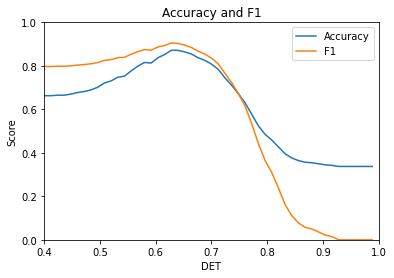

In [101]:
plot_ACCF1(thresholds, acclist, f1list)

### Precision and recall

In [103]:
def plot_PrecRecall(precision, recall, thresholds):
    plt.plot(recall, precision)

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall curve")

    plt.show()

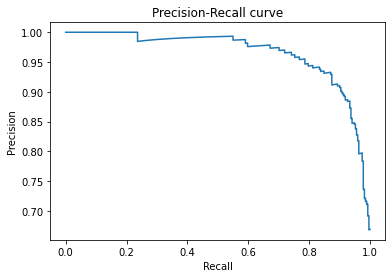

In [123]:
precision, recall, threshpr = metrics.precision_recall_curve(manualRatedDf["Match"].tolist(), manualRatedDf["Score"].tolist(), pos_label=1)
plot_PrecRecall(precision, recall, threshpr)

In [107]:
auc_PR = metrics.auc(recall, precision)
print("The Area Under the PR-curve is: ", auc_PR)

average_precisionli = metrics.average_precision_score(manualRatedDf["Match"].tolist(), manualRatedDf["Score"].tolist(), pos_label=1)
print("The average precision score is: ", average_precisionli)

The Area Under the PR-curve is:  0.9647254463073016
The average precision score is:  0.9648012467777938


In [4]:
print("Accuracy:",metrics.accuracy_score(manualRatedDf["Match"].tolist(), manualRatedDf["Score"].tolist()))
print("Precision:",metrics.precision_score(manualRatedDf["Match"].tolist(), manualRatedDf["Score"].tolist()))
print("Recall:",metrics.recall_score(manualRatedDf["Match"].tolist(), manualRatedDf["Score"].tolist()))
print("F1 score:",metrics.f1_score(manualRatedDf["Match"].tolist(), manualRatedDf["Score"].tolist()))
# print("Specificity:",(cnf_matrix[0][0]/(cnf_matrix[0][0]+cnf_matrix[0][1])))

NameError: name 'metrics' is not defined